## Creating a New Dataset with Generated Features

New features:
* Duration in days (already added previously)
* Number of Projects in the last week 
* Time since last project in the same category
    * Doesn't appear to work well with our data?
* Funding Rate optimism (goal amount / project duration)    

In [11]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt

In [12]:
#df_ks = pd.read_csv("../Data/Cleaned/joined_data.csv")

df_ks = pd.read_csv("../Data/Cleaned/joined_data.csv",
                 parse_dates=['deadline', 'launched'])

In [13]:
df_ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242630 entries, 0 to 242629
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   backers_count     242630 non-null  int64         
 1   blurb             242630 non-null  object        
 2   blurb_length      242630 non-null  int64         
 3   spotlight         242630 non-null  bool          
 4   staff_pick        242630 non-null  bool          
 5   location_state    242630 non-null  object        
 6   name              242630 non-null  object        
 7   category          242630 non-null  object        
 8   main_category     242630 non-null  object        
 9   deadline          242630 non-null  datetime64[ns]
 10  launched          242630 non-null  datetime64[ns]
 11  state             242630 non-null  float64       
 12  country           242630 non-null  object        
 13  usd_pledged_real  242630 non-null  float64       
 14  usd_

### Number of projects in the last week

launched
2009-04-24     0.0
2009-04-25     1.0
2009-04-28     2.0
2009-04-29     3.0
2009-04-29     4.0
2009-04-29     5.0
2009-04-29     6.0
2009-04-29     7.0
2009-04-29     8.0
2009-04-30     9.0
2009-04-30    10.0
2009-04-30    11.0
2009-04-30    12.0
2009-05-01    12.0
2009-05-01    13.0
2009-05-01    14.0
2009-05-01    15.0
2009-05-03    15.0
2009-05-04    16.0
2009-05-04    17.0
Name: count_7_days, dtype: float64


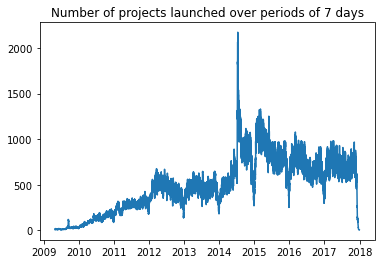

In [14]:
# First, create a Series with a timestamp index
launched = pd.Series(df_ks.index, index=df_ks.launched, name="count_7_days").sort_index()

count_7_days = launched.rolling('7d').count() - 1
print(count_7_days.head(20))

# Ignore records with broken launch dates
plt.plot(count_7_days[7:]);
plt.title("Number of projects launched over periods of 7 days");

In [15]:
count_7_days.index = launched.values
count_7_days = count_7_days.reindex(df_ks.index)

In [18]:
df_ks = df_ks.join(count_7_days)

### Time since project in the same category was launched

In [22]:
def time_since_last_project(series):
    # Return the time in hours
    return series.diff().dt.total_seconds() / 3600.

df = df_ks[['category', 'launched']].sort_values('launched')
timedeltas = df.groupby('category').transform(time_since_last_project)
timedeltas.head(20)

,launched
192830,NaN
70,NaN
235966,NaN
19910,96.0
58144,NaN
29973,NaN
131600,NaN
52975,NaN
91489,NaN
242594,NaN


In [28]:
# Final time since last project
timedeltas = timedeltas.fillna(timedeltas.median()).reindex(df_ks.index)
timedeltas.head(10)

,launched
0,72.0
1,0.0
2,120.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,24.0


### Funding Rate Optimism
* Optimism = goal / duration
* In other words, it is how much money the project owners need to make a day to reach their funding goal. 

In [31]:
df_ks['optimism'] = df_ks['usd_goal_real'] / df_ks['duration_days']

In [32]:
df_ks.head()

,backers_count,blurb,blurb_length,spotlight,staff_pick,location_state,name,category,main_category,deadline,...,launch_hour,launch_day,launch_month,launch_year,deadline_day,deadline_month,deadline_year,duration_days,count_7_days,optimism
0,4,Raising money to help my grandmother recover f...,24,False,False,OH,Grandma's are Life,World Music,Music,2016-11-18,...,15,19,10,2016,18,11,2016,30,778.0,500.000000
1,11,My work is performance based but I branch out ...,24,True,False,Scotland,Meta,Performance Art,Art,2015-05-06,...,0,8,4,2015,6,5,2015,28,1086.0,8.257143
2,18,A sanctuary for humans and felines alike! Come...,24,False,False,IL,Puss N' Books: A relaxing cat cafe and bookstore.,Spaces,Food,2015-11-26,...,16,27,10,2015,26,11,2015,30,849.0,666.666667
3,42,Taste Makers is a socially conscious brand tha...,23,False,True,BC,TASTE MAKERS BY TRISH P,Ready-to-wear,Fashion,2015-07-30,...,20,15,6,2015,30,7,2015,45,917.0,306.560444
4,68,"The BEST beef sticks, beef jerky and signature...",13,True,False,WI,The Meat Candy Experience,Small Batch,Food,2016-07-01,...,0,17,5,2016,1,7,2016,45,705.0,55.555556


In [36]:
df_ks.to_csv("../Data/Cleaned/generated_data.csv", index = False)